# **Crop Recommendation Analysis**
---
---

---
### **IMPORT LIBRARIES AND OTHER DEPENDENCIES**
---

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
import matplotlib.pyplot as plt
import spacy

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

---
---

### **DATA WRANGLING** 
---
---

---
### DATA GATHERING
---

In [2]:
df = pd.read_csv('Crop_Recommendation.csv')
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Nitrogen     2200 non-null   int64  
 1   Phosphorus   2200 non-null   int64  
 2   Potassium    2200 non-null   int64  
 3   Temperature  2200 non-null   float64
 4   Humidity     2200 non-null   float64
 5   pH_Value     2200 non-null   float64
 6   Rainfall     2200 non-null   float64
 7   Crop         2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [4]:
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [5]:
df.isna().sum()
print("Number of NaN data in column", df.isnull().sum())

Number of NaN data in column Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64


In [6]:
df.isnull().sum()
print("Number of null data in column", df.isnull().sum())


Number of null data in column Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64


In [7]:
df.duplicated().sum()
print("Number of duplicated data within the dataset is", df.duplicated().sum())

Number of duplicated data within the dataset is 0


---

### PRE PROCESSING

---

Encode the crop label

In [8]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Crop'] = label_encoder.fit_transform(df['Crop'])

In [9]:
df.head(10)

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,20
1,85,58,41,21.770462,80.319644,7.038096,226.655537,20
2,60,55,44,23.004459,82.320763,7.840207,263.964248,20
3,74,35,40,26.491096,80.158363,6.980401,242.864034,20
4,78,42,42,20.130175,81.604873,7.628473,262.717340,20
5,69,37,42,23.058049,83.370118,7.073454,251.055000,20
6,69,55,38,22.708838,82.639414,5.700806,271.324860,20
7,94,53,40,20.277744,82.894086,5.718627,241.974195,20
8,89,54,38,24.515881,83.535216,6.685346,230.446236,20
9,68,58,38,23.223974,83.033227,6.336254,221.209196,20


---
---
### **FEATURE EXTRACTION**
---
---

In [10]:
features = df.drop('Crop', axis=1)
target = df['Crop']

In [11]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
# Standardize the features
scaler = StandardScaler()
features_standardized = scaler.fit_transform(features)
features_standardized_df = pd.DataFrame(features_standardized, columns=features.columns)
print(features_standardized_df)

      Nitrogen  Phosphorus  Potassium  Temperature  Humidity  pH_Value  \
0     1.068797   -0.344551  -0.101688    -0.935587  0.472666  0.043302   
1     0.933329    0.140616  -0.141185    -0.759646  0.397051  0.734873   
2     0.255986    0.049647  -0.081939    -0.515898  0.486954  1.771510   
3     0.635298   -0.556811  -0.160933     0.172807  0.389805  0.660308   
4     0.743673   -0.344551  -0.121436    -1.083647  0.454792  1.497868   
...        ...         ...        ...          ...       ...       ...   
2195  1.529390   -0.587134  -0.318922     0.228814 -0.227709  0.401395   
2196  1.312641   -1.163269  -0.417666     0.355720 -0.666947 -0.494413   
2197  1.827421   -0.617457  -0.358420    -0.293218 -0.191235 -0.138120   
2198  1.800327   -0.647780  -0.279425     0.129612 -0.869518  0.373904   
2199  1.448109   -1.072300  -0.358420    -0.397667 -0.498020  0.401096   

      Rainfall  
0     1.810361  
1     2.242058  
2     2.921066  
3     2.537048  
4     2.898373  
...      

In [12]:
X_train, X_test, y_train, y_test = train_test_split(features_standardized_df, target, test_size=0.2, random_state=42)

---
---

### **Creating Model**

---
---

---
#### Linear SVM Model
---

##### Base TF-IDF

In [13]:
svm_model = LinearSVC(dual='auto')
svm_model.fit(X_train, y_train)

y_pred_svm = svm_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_svm)

print("Linear SVM Accuracy:", accuracy_score(y_test, y_pred_svm))
print("Linear SVM Classification Report:")
print(classification_report(y_test, y_pred_svm))

Linear SVM Accuracy: 0.9613636363636363
Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       0.96      1.00      0.98        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.89      0.74      0.81        23
           9       0.95      0.95      0.95        20
          10       0.92      1.00      0.96        11
          11       0.95      0.95      0.95        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
       

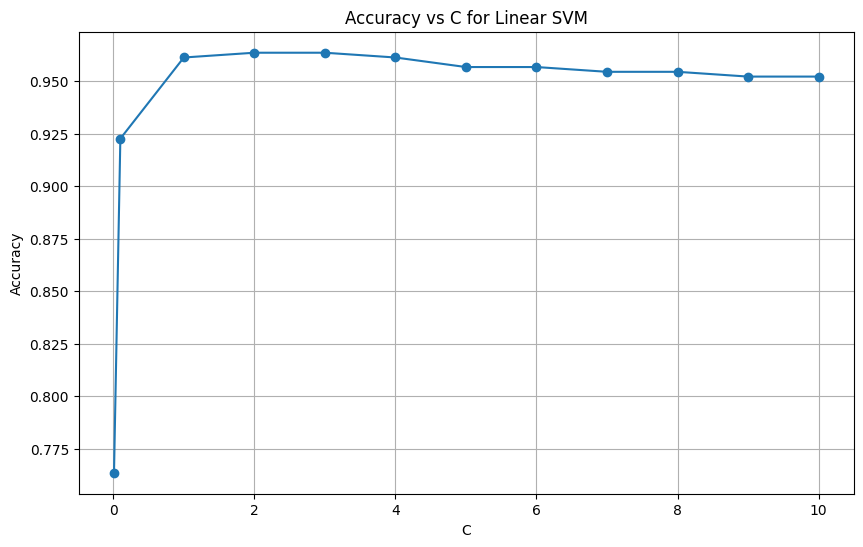

Best C value: 2
Tuned Linear SVM Accuracy: 0.9636363636363636
Tuned Linear SVM Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       0.96      1.00      0.98        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.90      0.78      0.84        23
           9       0.95      0.95      0.95        20
          10       0.92      1.00      0.96        11
          11       0.95      0.95      0.95        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Define the values of C to search
C_values = [0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

accuracies = []

for C in C_values:
    # Initialize and train the LinearSVC model with the current C value
    svm_model = LinearSVC(dual='auto', C=C)
    svm_model.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svm_model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Check if this C value gives better accuracy

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C for Linear SVM')
plt.grid(True)
plt.show()

# Find the best C value that gives the highest accuracy
best_accuracy = max(accuracies)
best_C = C_values[accuracies.index(best_accuracy)]

# Train a new model using the best C value
svm_model_tuned = LinearSVC(dual='auto', C=best_C)
svm_model_tuned.fit(X_train, y_train)

# Make predictions
y_pred_svm_tuned = svm_model_tuned.predict(X_test)

# Evaluate performance
accuracy_tuned = accuracy_score(y_test, y_pred_svm_tuned)
print("Best C value:", best_C)
print("Tuned Linear SVM Accuracy:", accuracy_tuned)
print("Tuned Linear SVM Classification Report:")
print(classification_report(y_test, y_pred_svm_tuned))


---
### SVC Kernel Based Model
---

---
#### Polynomial Kernel
---

##### Base TF-IDF

In [15]:
svc_poly_model = SVC(kernel='poly')

# Fit the model on the training data
svc_poly_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_poly = svc_poly_model.predict(X_test)

# Calculate accuracy
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print("SVC with Polynomial Kernel Accuracy:", accuracy_poly)

print("\nSVC with Polynomial Kernel Classification Report:")
print(classification_report(y_test, y_pred_poly))

SVC with Polynomial Kernel Accuracy: 0.9204545454545454

SVC with Polynomial Kernel Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      0.95      0.98        21
           2       0.86      0.90      0.88        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      0.88      0.94        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.78      0.91      0.84        23
           9       1.00      1.00      1.00        20
          10       0.67      0.91      0.77        11
          11       0.57      1.00      0.72        21
          12       0.95      1.00      0.97        19
          13       1.00      0.71      0.83        24
          14       0.90      1.00      0.95        19
          15       1.00     

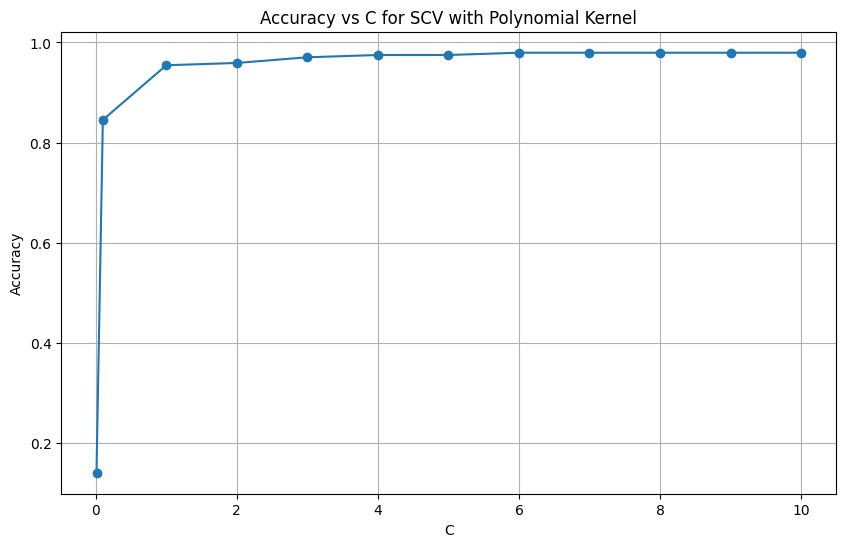

Best C value: 6
Tuned SCV with Polynomial Kernel Accuracy: 0.9795454545454545
Tuned SCV with Polynomial Kernel Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.88      0.96      0.92        23
           9       1.00      1.00      1.00        20
          10       0.73      1.00      0.85        11
          11       0.95      1.00      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
 

In [16]:
C_values = [0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

accuracies = []

for C in C_values:
    # Initialize and train the LinearSVC model with the current C value
    svc_poly_tuned = SVC(kernel='poly', degree=2, gamma='scale',C=C)
    svc_poly_tuned.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svc_poly_tuned.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Check if this C value gives better accuracy

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C for SCV with Polynomial Kernel')
plt.grid(True)
plt.show()

# Find the best C value that gives the highest accuracy
best_accuracy = max(accuracies)
best_C = C_values[accuracies.index(best_accuracy)]

# Train a new model using the best C value
svc_poly_tuned = SVC(kernel='poly', degree=2, gamma='scale',C=best_C)
svc_poly_tuned.fit(X_train, y_train)

# Make predictions
y_pred_poly_tuned = svc_poly_tuned.predict(X_test)

# Evaluate performance
accuracy_tuned = accuracy_score(y_test, y_pred_poly_tuned)
print("Best C value:", best_C)
print("Tuned SCV with Polynomial Kernel Accuracy:", accuracy_tuned)
print("Tuned SCV with Polynomial Kernel Classification Report:")
print(classification_report(y_test, y_pred_poly_tuned))


---
#### Radial Basis Function (RBF) Kernel
---

##### Base TF-IDF

In [17]:
svc_rbf_model = SVC(kernel='rbf')

# Fit the model on the training data
svc_rbf_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_rbf = svc_rbf_model.predict(X_test)

# Calculate accuracy
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print("SVC with RBF Kernel Accuracy:", accuracy_rbf)

print("\nSVC with RBF Kernel Classification Report:")
print(classification_report(y_test, y_pred_rbf))

SVC with RBF Kernel Accuracy: 0.9681818181818181

SVC with RBF Kernel Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.78      0.91      0.84        23
           9       0.91      1.00      0.95        20
          10       0.79      1.00      0.88        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.0

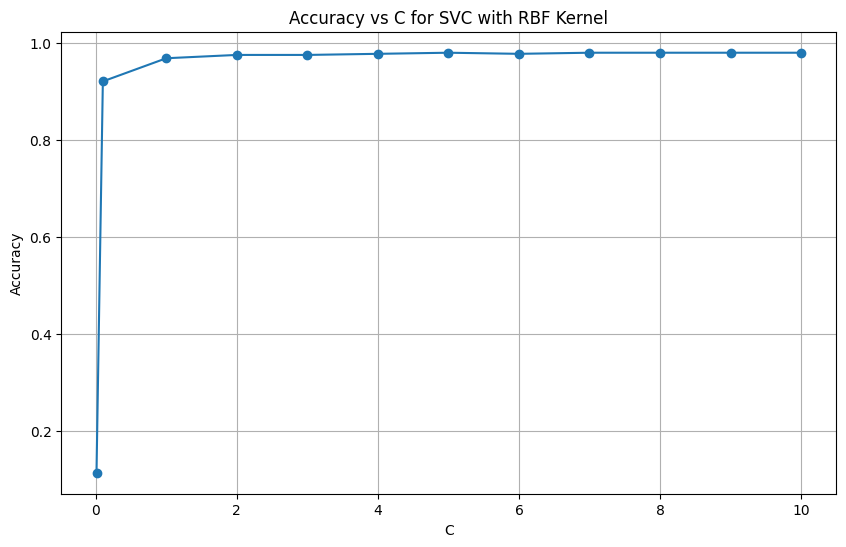

Best C value: 5
Tuned SVC with RBF Kernel Accuracy: 0.9795454545454545
Tuned SVC with RBF Kernel Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      0.95      0.95        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.88      1.00      0.94        23
           9       0.91      1.00      0.95        20
          10       0.79      1.00      0.88        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15   

In [18]:
C_values = [0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

accuracies = []

for C in C_values:
    # Initialize and train the LinearSVC model with the current C value
    svc_rbf_tuned = SVC(kernel='rbf', gamma='scale',C=C)
    svc_rbf_tuned.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svc_rbf_tuned.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Check if this C value gives better accuracy

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C for SVC with RBF Kernel')
plt.grid(True)
plt.show()

# Find the best C value that gives the highest accuracy
best_accuracy = max(accuracies)
best_C = C_values[accuracies.index(best_accuracy)]

# Train a new model using the best C value
svc_rbf_tuned = SVC(kernel='rbf', gamma='scale',C=best_C)
svc_rbf_tuned.fit(X_train, y_train)

# Make predictions
y_pred_rbf_tuned = svc_rbf_tuned.predict(X_test)

# Evaluate performance
accuracy_tuned = accuracy_score(y_test, y_pred_rbf_tuned)
print("Best C value:", best_C)
print("Tuned SVC with RBF Kernel Accuracy:", accuracy_tuned)
print("Tuned SVC with RBF Kernel Classification Report:")
print(classification_report(y_test, y_pred_rbf_tuned))


---
#### Sigmoid Kernel
---

##### Base TF-IDF

In [19]:
svc_sig_model = SVC(kernel='sigmoid')

# Fit the model on the training data
svc_sig_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_sig = svc_sig_model.predict(X_test)

# Calculate accuracy
accuracy_sig = accuracy_score(y_test, y_pred_sig)
print("SVC with Sigmoid Kernel Accuracy:", accuracy_sig)

print("\nSVC with Sigmoid Kernel Classification Report:")
print(classification_report(y_test, y_pred_sig))

SVC with Sigmoid Kernel Accuracy: 0.7704545454545455

SVC with Sigmoid Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        23
           1       1.00      1.00      1.00        21
           2       0.62      0.50      0.56        20
           3       1.00      1.00      1.00        26
           4       1.00      0.93      0.96        27
           5       0.94      1.00      0.97        17
           6       0.89      1.00      0.94        17
           7       0.28      0.64      0.39        14
           8       0.73      0.70      0.71        23
           9       0.86      0.95      0.90        20
          10       0.75      0.82      0.78        11
          11       1.00      0.86      0.92        21
          12       0.64      0.74      0.68        19
          13       0.35      0.50      0.41        24
          14       0.88      0.79      0.83        19
          15       1.00      1.00 

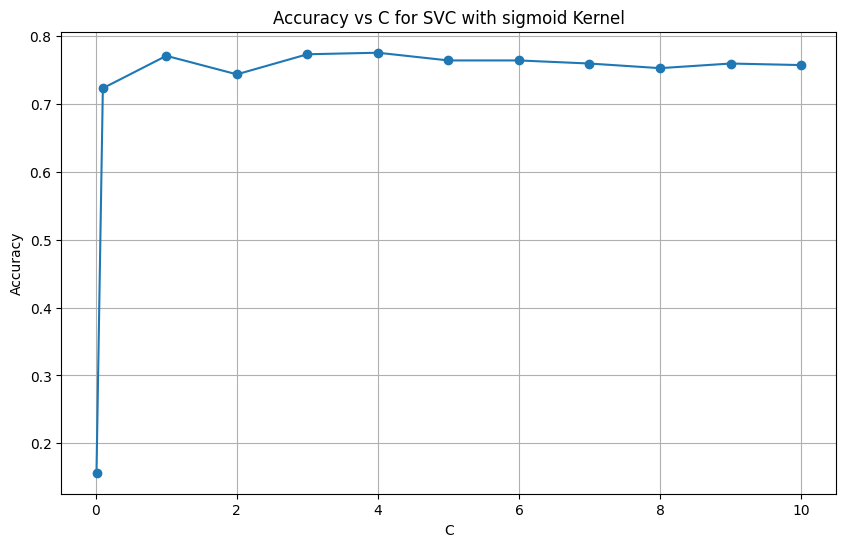

Best C value: 4
Tuned SVC with RBF Kernel Accuracy: 0.775
Tuned SVC with RBF Kernel Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.78      0.73        23
           1       1.00      1.00      1.00        21
           2       0.56      0.45      0.50        20
           3       0.96      1.00      0.98        26
           4       0.93      0.93      0.93        27
           5       1.00      0.94      0.97        17
           6       0.94      1.00      0.97        17
           7       0.55      0.43      0.48        14
           8       0.70      0.70      0.70        23
           9       0.77      0.85      0.81        20
          10       0.89      0.73      0.80        11
          11       1.00      0.90      0.95        21
          12       0.76      0.68      0.72        19
          13       0.29      0.46      0.35        24
          14       0.87      0.68      0.76        19
          15       1.00     

In [20]:
C_values = [0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

accuracies = []

for C in C_values:
    # Initialize and train the LinearSVC model with the current C value
    svc_sig_tuned = SVC(kernel='sigmoid', gamma='scale',C=C)
    svc_sig_tuned.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svc_sig_tuned.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Check if this C value gives better accuracy

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C for SVC with sigmoid Kernel')
plt.grid(True)
plt.show()

# Find the best C value that gives the highest accuracy
best_accuracy = max(accuracies)
best_C = C_values[accuracies.index(best_accuracy)]

# Train a new model using the best C value
svc_sig_tuned = SVC(kernel='sigmoid', gamma='scale',C=best_C)
svc_sig_tuned.fit(X_train, y_train)

# Make predictions
y_pred_sig_tuned = svc_sig_tuned.predict(X_test)

# Evaluate performance
accuracy_tuned = accuracy_score(y_test, y_pred_sig_tuned)
print("Best C value:", best_C)
print("Tuned SVC with RBF Kernel Accuracy:", accuracy_tuned)
print("Tuned SVC with RBF Kernel Classification Report:")
print(classification_report(y_test, y_pred_sig_tuned))


---
#### Linear Kernel
---

In [21]:
svc_lin_model = SVC(kernel='linear')

# Fit the model on the training data
svc_lin_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_lin = svc_lin_model.predict(X_test)

# Calculate accuracy
accuracy_lin = accuracy_score(y_test, y_pred_lin)
print("SVC with Linear Kernel Accuracy:", accuracy_lin)

print("\nSVC with Linear Kernel Classification Report:")
print(classification_report(y_test, y_pred_lin))

SVC with Linear Kernel Accuracy: 0.9772727272727273

SVC with Linear Kernel Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.85      0.96      0.90        23
           9       0.91      1.00      0.95        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.96      0.98        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00   

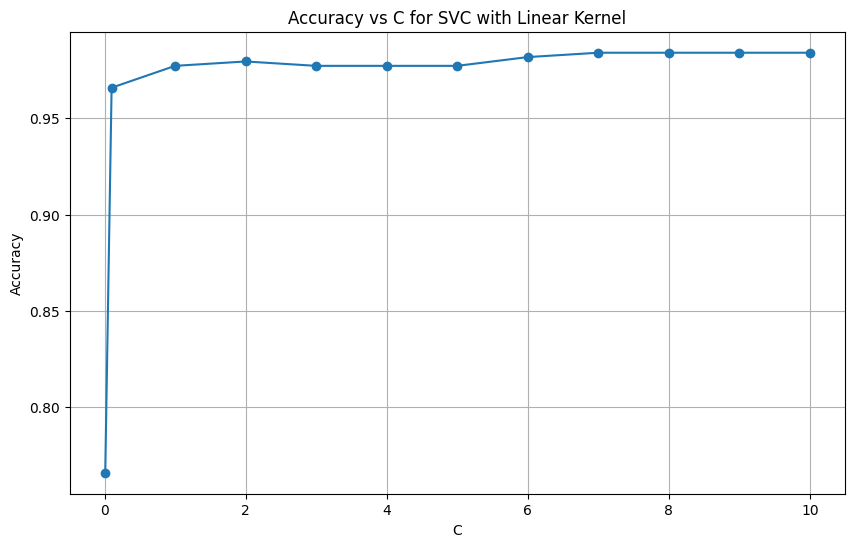

Best C value: 7
Tuned SVC with RBF Kernel Accuracy: 0.9840909090909091
Tuned SVC with RBF Kernel Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      0.94      0.97        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.84      0.91      0.88        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15   

In [22]:
C_values = [0.01, 0.1, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

accuracies = []

for C in C_values:
    # Initialize and train the LinearSVC model with the current C value
    svc_lin_tuned = SVC(kernel='linear',C=C)
    svc_lin_tuned.fit(X_train, y_train)

    # Make predictions on the test set
    y_pred = svc_lin_tuned.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    # Check if this C value gives better accuracy

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(C_values, accuracies, marker='o')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('Accuracy vs C for SVC with Linear Kernel')
plt.grid(True)
plt.show()

# Find the best C value that gives the highest accuracy
best_accuracy = max(accuracies)
best_C = C_values[accuracies.index(best_accuracy)]

# Train a new model using the best C value
svc_lin_tuned = SVC(kernel='linear', gamma='scale',C=best_C)
svc_lin_tuned.fit(X_train, y_train)

# Make predictions
y_pred_lin_tuned = svc_lin_tuned.predict(X_test)

# Evaluate performance
accuracy_tuned = accuracy_score(y_test, y_pred_lin_tuned)
print("Best C value:", best_C)
print("Tuned SVC with RBF Kernel Accuracy:", accuracy_tuned)
print("Tuned SVC with RBF Kernel Classification Report:")
print(classification_report(y_test, y_pred_lin_tuned))


---
### KNN Model
---


In [23]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)  # You can adjust n_neighbors
knn.fit(X_train, y_train)

# Make predictions
y_pred_KNN = knn.predict(X_test)

# Evaluate the model
accuracy_KNN = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Calculate accuracy
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)
print("KNN Model Accuracy:", accuracy_KNN)

print("\nKNN Model Classification Report:")
print(classification_report(y_test, y_pred_KNN))

KNN Model Accuracy: 0.9681818181818181

KNN Model Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.85      0.96      0.90        23
           9       0.91      1.00      0.95        20
          10       0.73      1.00      0.85        11
          11       1.00      0.95      0.98        21
          12       0.90      1.00      0.95        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
        

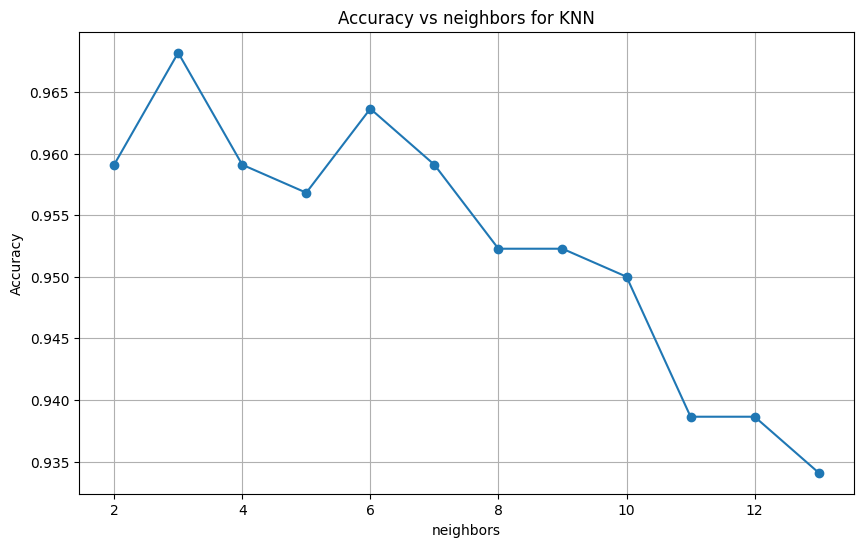

Best neighbors value: 3
Tuned KNN Accuracy: 0.9681818181818181
Tuned KNN Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      0.95      0.97        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       0.94      1.00      0.97        17
           6       0.94      1.00      0.97        17
           7       1.00      1.00      1.00        14
           8       0.85      0.96      0.90        23
           9       0.91      1.00      0.95        20
          10       0.73      1.00      0.85        11
          11       1.00      0.95      0.98        21
          12       0.90      1.00      0.95        19
          13       1.00      0.88      0.93        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      

In [24]:
neighbors_values = [2,3,4,5,6,7,8,9,10,11,12,13]

accuracies = []

for n in neighbors_values:
    knn = KNeighborsClassifier(n_neighbors=n)  # You can adjust n_neighbors
    knn.fit(X_train, y_train)

    # Make predictions
    y_pred_KNN = knn.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred_KNN)
    accuracies.append(accuracy)

# Plot the graph
plt.figure(figsize=(10, 6))
plt.plot(neighbors_values, accuracies, marker='o')
plt.xlabel('neighbors')
plt.ylabel('Accuracy')
plt.title('Accuracy vs neighbors for KNN')
plt.grid(True)
plt.show()

# Find the best C value that gives the highest accuracy
best_accuracy = max(accuracies)
best_neighbors = neighbors_values[accuracies.index(best_accuracy)]

# Train a new model using the best C value
knn_tuned = KNeighborsClassifier(n_neighbors=best_neighbors)  # You can adjust n_neighbors
knn_tuned.fit(X_train, y_train)

# Make predictions
y_pred_KNN_tuned = knn_tuned.predict(X_test)

# Evaluate performance
accuracy_tuned = accuracy_score(y_test, y_pred_KNN_tuned)
print("Best neighbors value:", best_neighbors)
print("Tuned KNN Accuracy:", accuracy_tuned)
print("Tuned KNN Classification Report:")
print(classification_report(y_test, y_pred_KNN_tuned))


---
### Decision Tree Model
---

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree classifier
dt.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt.predict(X_test)

# Evaluate the model
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("Decision Tree Accuracy:", accuracy_dt)
print("Decision Tree Classification Report:")
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9863636363636363
Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       0.95      1.00      0.98        20
           3       1.00      1.00      1.00        26
           4       0.96      1.00      0.98        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      0.96      0.94        23
           9       1.00      1.00      1.00        20
          10       0.92      1.00      0.96        11
          11       1.00      0.95      0.98        21
          12       1.00      1.00      1.00        19
          13       1.00      0.92      0.96        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
 

---
### Naive Baiyess Model
---

Gaussian Naive Baiyess

In [26]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# Train the model
gnb.fit(X_train, y_train)

# Make predictions
y_pred_gnb = gnb.predict(X_test)

accuracy_gnb = accuracy_score(y_test, y_pred_gnb)
print("Naive Bayes Accuracy:", accuracy_gnb)
print("Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_gnb))

Naive Bayes Accuracy: 0.9954545454545455
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        23
           1       1.00      1.00      1.00        21
           2       1.00      1.00      1.00        20
           3       1.00      1.00      1.00        26
           4       1.00      1.00      1.00        27
           5       1.00      1.00      1.00        17
           6       1.00      1.00      1.00        17
           7       1.00      1.00      1.00        14
           8       0.92      1.00      0.96        23
           9       1.00      1.00      1.00        20
          10       1.00      1.00      1.00        11
          11       1.00      1.00      1.00        21
          12       1.00      1.00      1.00        19
          13       1.00      1.00      1.00        24
          14       1.00      1.00      1.00        19
          15       1.00      1.00      1.00        17
     

---
### Artifical Neural Networks Model
---


In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

target_categorical = to_categorical(target)
X_train_ann, X_test_ann, y_train_ann, y_test_ann = train_test_split(features_standardized_df, target_categorical, test_size=0.2, random_state=42)

# Initialize the ANN model
model = Sequential()

# Add input layer and first hidden layer
model.add(Dense(units=8, activation='relu', input_dim=X_train.shape[1]))

# Add second hidden layer
model.add(Dense(units=8, activation='relu'))

# Add output layer
model.add(Dense(units=target_categorical.shape[1], activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_ann, y_train_ann, epochs=100, batch_size=10, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy_ann = model.evaluate(X_test_ann, y_test_ann)
print("ANN Model Accuracy:", accuracy)

# Make predictions
y_pred_ann = model.predict(X_test_ann)
y_pred_ann_classes = np.argmax(y_pred_ann, axis=1)
y_test_classes = np.argmax(y_test_ann, axis=1)

# Print classification report
print("ANN Classification Report:")
print(classification_report(y_test_classes, y_pred_ann_classes))



Epoch 1/100


/opt/homebrew/lib/python3.12/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - accuracy: 0.0819 - loss: 3.1026 - val_accuracy: 0.0909 - val_loss: 2.9616
Epoch 2/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 376us/step - accuracy: 0.1220 - loss: 2.8949 - val_accuracy: 0.1705 - val_loss: 2.7138
Epoch 3/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.2283 - loss: 2.5982 - val_accuracy: 0.2841 - val_loss: 2.3391
Epoch 4/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 372us/step - accuracy: 0.3388 - loss: 2.2207 - val_accuracy: 0.4205 - val_loss: 1.9494
Epoch 5/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 374us/step - accuracy: 0.5155 - loss: 1.8169 - val_accuracy: 0.5312 - val_loss: 1.5858
Epoch 6/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.5791 - loss: 1.4728 - val_accuracy: 0.5994 - val_loss: 1.2768
Epoch 7/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 385us/step - accuracy: 0.6248 - loss: 1.2136 - val_accuracy: 0.6761 - val_loss: 1.0455
Epoch 8/100
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.7237 - loss: 0.9843 - val_

---
---
### **FINAL RESULT**
---
---

In [29]:
print("Accuracy score for LinearSVM model tuned", accuracy_score(y_test, y_pred_svm_tuned))
print("Accuracy score for SVC with Polynomial Kernel model tuned", accuracy_score(y_test, y_pred_poly_tuned))
print("Accuracy score for SVC with RBF Kernel tuned", accuracy_score(y_test, y_pred_rbf_tuned))
print("Accuracy score for SVC with sigmoid Kernel tuned", accuracy_score(y_test, y_pred_sig_tuned))
print("Accuracy score for SVC with linear Kernel tuned", accuracy_score(y_test, y_pred_lin_tuned))
print("Accuracy score for KNN tuned", accuracy_score(y_test, y_pred_KNN_tuned))
print("Accuracy score for Decision Tree", accuracy_score(y_test, y_pred_dt))
print("Accuracy score for Naive Baiyess", accuracy_score(y_test, y_pred_gnb))
print("Accuracy score for Artificial Neuro Network", accuracy_ann )


Accuracy score for LinearSVM model tuned 0.9636363636363636
Accuracy score for SVC with Polynomial Kernel model tuned 0.9795454545454545
Accuracy score for SVC with RBF Kernel tuned 0.9795454545454545
Accuracy score for SVC with sigmoid Kernel tuned 0.775
Accuracy score for SVC with linear Kernel tuned 0.9840909090909091
Accuracy score for KNN tuned 0.9681818181818181
Accuracy score for Decision Tree 0.9863636363636363
Accuracy score for Naive Baiyess 0.9954545454545455
Accuracy score for Artificial Neuro Network 0.956818163394928


---
---
#  **END OF CODE** 
---
---